In [20]:
# Start with loading all necessary libraries
import random
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings("ignore")

import jieba
jieba.enable_parallel(4)
# Setting up parallel processes :4 ,but unable to run on Windows
from os import path
from imageio import imread
import os
# jieba.load_userdict("txt\userdict.txt")
# add userdict by load_userdict()
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [13]:
word_bin = ['张立今','科技','北京德塔数据','北京','德塔','德塔数据','有限公司','英俊' ,'闪联', '闪汇痛' ,'张总' ,'联想' ,'联想游戏' ,'ProctorExam' ,'PilotMedia' ,'Linguaskill', 'Cambridge English', 'DataProX', 'DPX']

In [14]:
word_bin_2 = ['计算机','区块链','IoT','BlockChain', 'BigData', '大数据','中关村', '软件园','孵化器3号楼A坐']

In [15]:
words = word_bin + word_bin_2
words

['张立今',
 '科技',
 '北京德塔数据',
 '北京',
 '德塔',
 '德塔数据',
 '有限公司',
 '英俊',
 '闪联',
 '闪汇痛',
 '张总',
 '联想',
 '联想游戏',
 'ProctorExam',
 'PilotMedia',
 'Linguaskill',
 'Cambridge English',
 'DataProX',
 'DPX',
 '计算机',
 '区块链',
 'IoT',
 'BlockChain',
 'BigData',
 '大数据',
 '中关村',
 '软件园',
 '孵化器3号楼A坐']

In [23]:
stopwords_path = './stopwords_cn.txt'
font_path = './fonts/cn1/MaShanZheng-Regular.ttf'

In [24]:
userdict_list = ['阿Ｑ', '孔乙己', '单四嫂子']


# The function for processing text with Jieba
def jieba_processing_txt(text):
    for word in userdict_list:
        jieba.add_word(word)

    mywordlist = []
    seg_list = jieba.cut(text, cut_all=False)
    liststr = "/ ".join(seg_list)

    with open(stopwords_path, encoding='utf-8') as f_stop:
        f_stop_text = f_stop.read()
        f_stop_seg_list = f_stop_text.splitlines()

    for myword in liststr.split('/'):
        if not (myword.strip() in f_stop_seg_list) and len(myword.strip()) > 1:
            mywordlist.append(myword)
    return ' '.join(mywordlist)

In [68]:

wc = WordCloud(font_path=font_path, background_color="white", max_words=100,
               max_font_size=100, random_state=10, width=800, height=460, margin=0,)

In [69]:
full_text = ' '.join(words)

In [70]:
wc.generate(jieba_processing_txt(full_text))

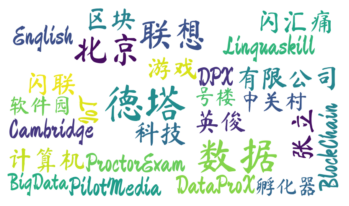

In [71]:
plt.figure()
# recolor wordcloud and show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [72]:
wc.to_file('./wc5.png')